In [ ]:
DECISION TREE:
    Supervised Machine Learning Algo.
    It can be used for classification and Regression.
    Types:
        Cart:(Ginni Index(ID-3),Information Gain,Entropy(D:4.5))
        Chait:(chi-square tech)
        Var Reduction:Regression
    HyperPara:fine tuning:
        max no sample rows in node split
        max no of no in turminal
        max no height of tree
        min of feature for  split
    

In [2]:
import pandas as pd
import numpy as np 
from numpy.random import default_rng
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Classification Using Decision Tree Based Algorithm

In [3]:
d_df=pd.read_csv(r"C:\Users\india\Downloads\DS2_C5_S4_Diabetes_Data_Concept.csv")
d_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
d_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
d_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
for col in d_df.columns:
    if d_df[col].nunique()<10:
        print(col)

Outcome


In [13]:
EDA:

SyntaxError: invalid syntax (2326876508.py, line 1)

In [8]:
d_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

In [64]:
d_df=pd.read_csv(r"C:\Users\india\Downloads\DS2_C5_S4_Diabetes_Data_Concept.csv")
d_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

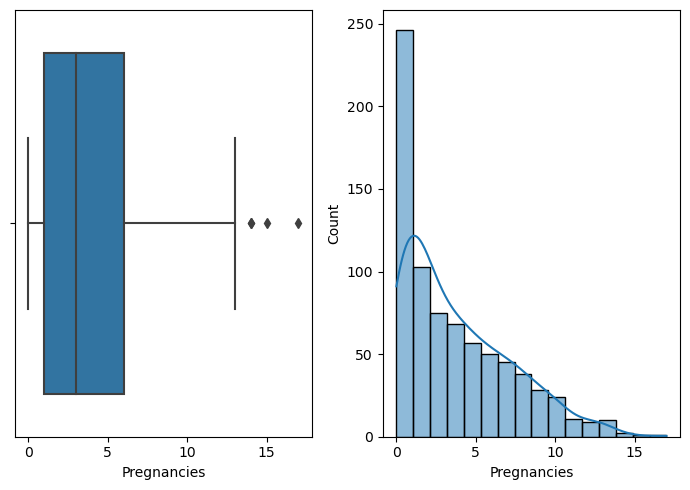

In [10]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(7,5))
sns.boxplot(x=d_df['Pregnancies'],ax=ax[0])
sns.histplot(x=d_df['Pregnancies'],kde=True,ax=ax[1])
plt.tight_layout()
plt.show()

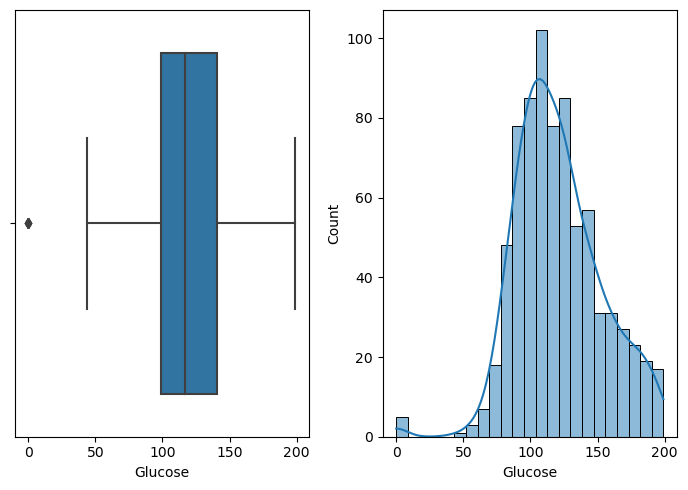

In [11]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(7,5))
sns.boxplot(x=d_df['Glucose'],ax=ax[0])
sns.histplot(x=d_df['Glucose'],kde=True,ax=ax[1])
plt.tight_layout()
plt.show()

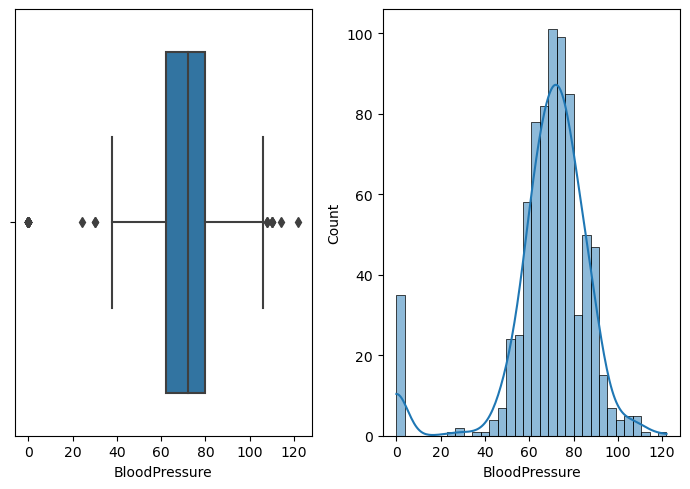

In [12]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(7,5))
sns.boxplot(x=d_df['BloodPressure'],ax=ax[0])
sns.histplot(x=d_df['BloodPressure'],kde=True,ax=ax[1])
plt.tight_layout()
plt.show()

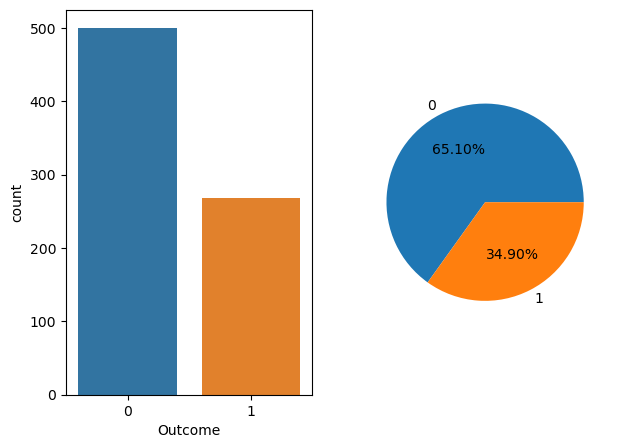

In [17]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(7,5))
sns.countplot(x=d_df['Outcome'],ax=ax[0])
plt.pie(x=d_df['Outcome'].value_counts().values,labels=d_df['Outcome'].value_counts().index,autopct='%.2f%%')
plt.show()

<Axes: xlabel='BMI', ylabel='Glucose'>

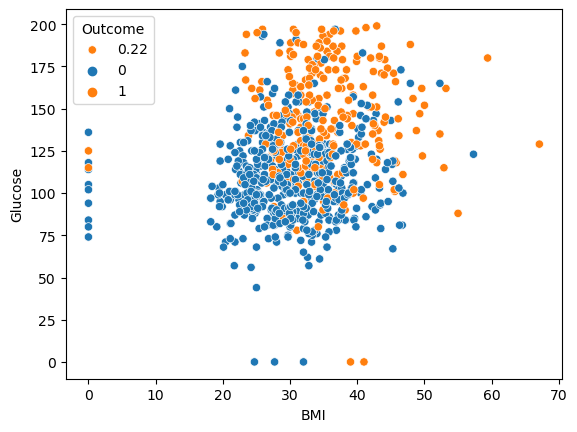

In [47]:
sns.scatterplot(x=d_df['BMI'],
                y=d_df['Glucose'],
                label=round(d_df['BMI'].corr(d_df['Glucose']),2),
                hue=d_df['Outcome'])


<Axes: xlabel='BMI', ylabel='Glucose'>

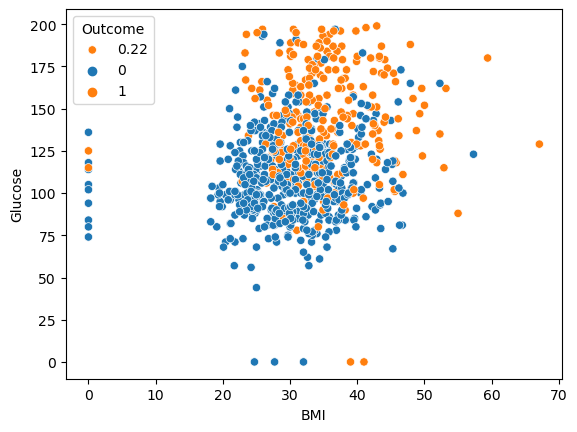

In [19]:
sns.scatterplot(x=d_df['BMI'],
                y=d_df['Glucose'],
                label=round(d_df['BMI'].corr(d_df['Glucose']),2),
                hue=d_df['Outcome'])

<Axes: xlabel='BloodPressure', ylabel='Glucose'>

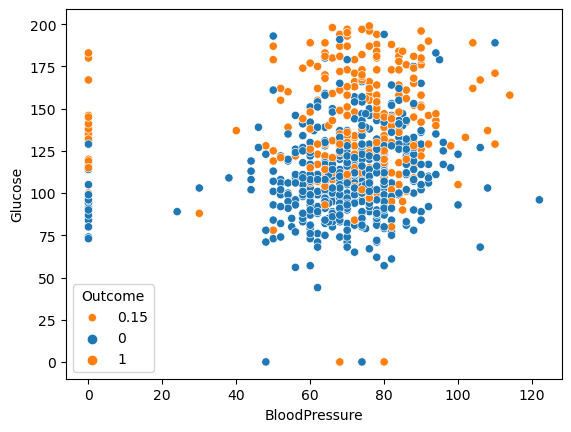

In [20]:
sns.scatterplot(x=d_df['BloodPressure'],
                y=d_df['Glucose'],
                label=round(d_df['BloodPressure'].corr(d_df['Glucose']),2),
                hue=d_df['Outcome'])

<Axes: xlabel='Age', ylabel='Glucose'>

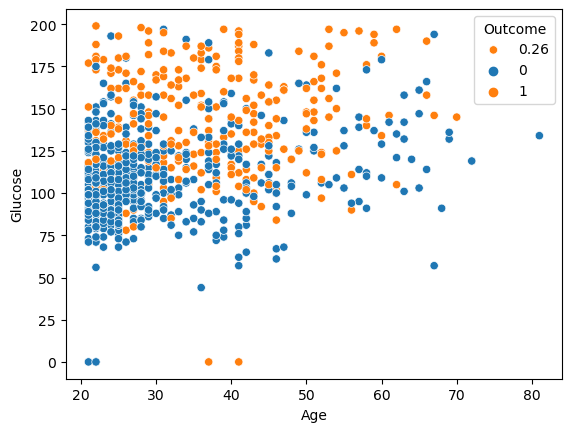

In [53]:
sns.scatterplot(x=d_df['Age'],
                y=d_df['Glucose'],
                label=round(d_df['Age'].corr(d_df['Glucose']),2),
                hue=d_df['Outcome'])

In [21]:
age_cat=pd.cut(x=d_df['Age'],bins=[20,30,40,50,60,70,85],labels=['Young','Middle','Senior','Super Senior','Old','Senior Citizen'])

<Axes: xlabel='Age', ylabel='Age'>

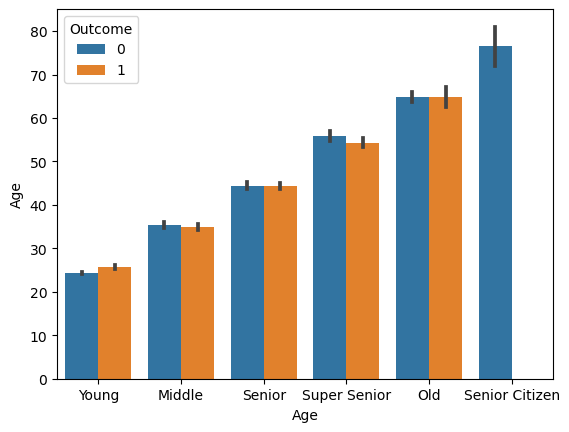

In [22]:
sns.barplot(x=age_cat,y=d_df["Age"],hue=d_df['Outcome'])

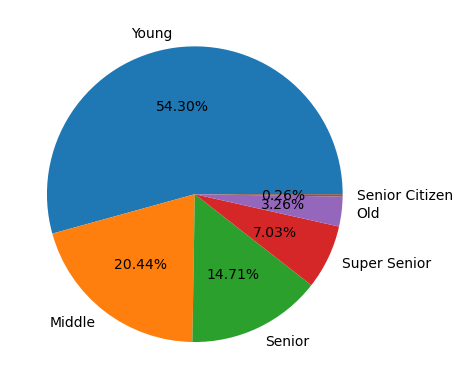

In [23]:
plt.pie(x=age_cat.value_counts().values,labels=age_cat.value_counts().index,autopct='%.2f%%')
plt.show()

In [ ]:
#create a heatmap

In [27]:
sns.heatmap(data=d_df.corr(),annot=True,linecolor='silver',linewidths=.6,fmt='.2f')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


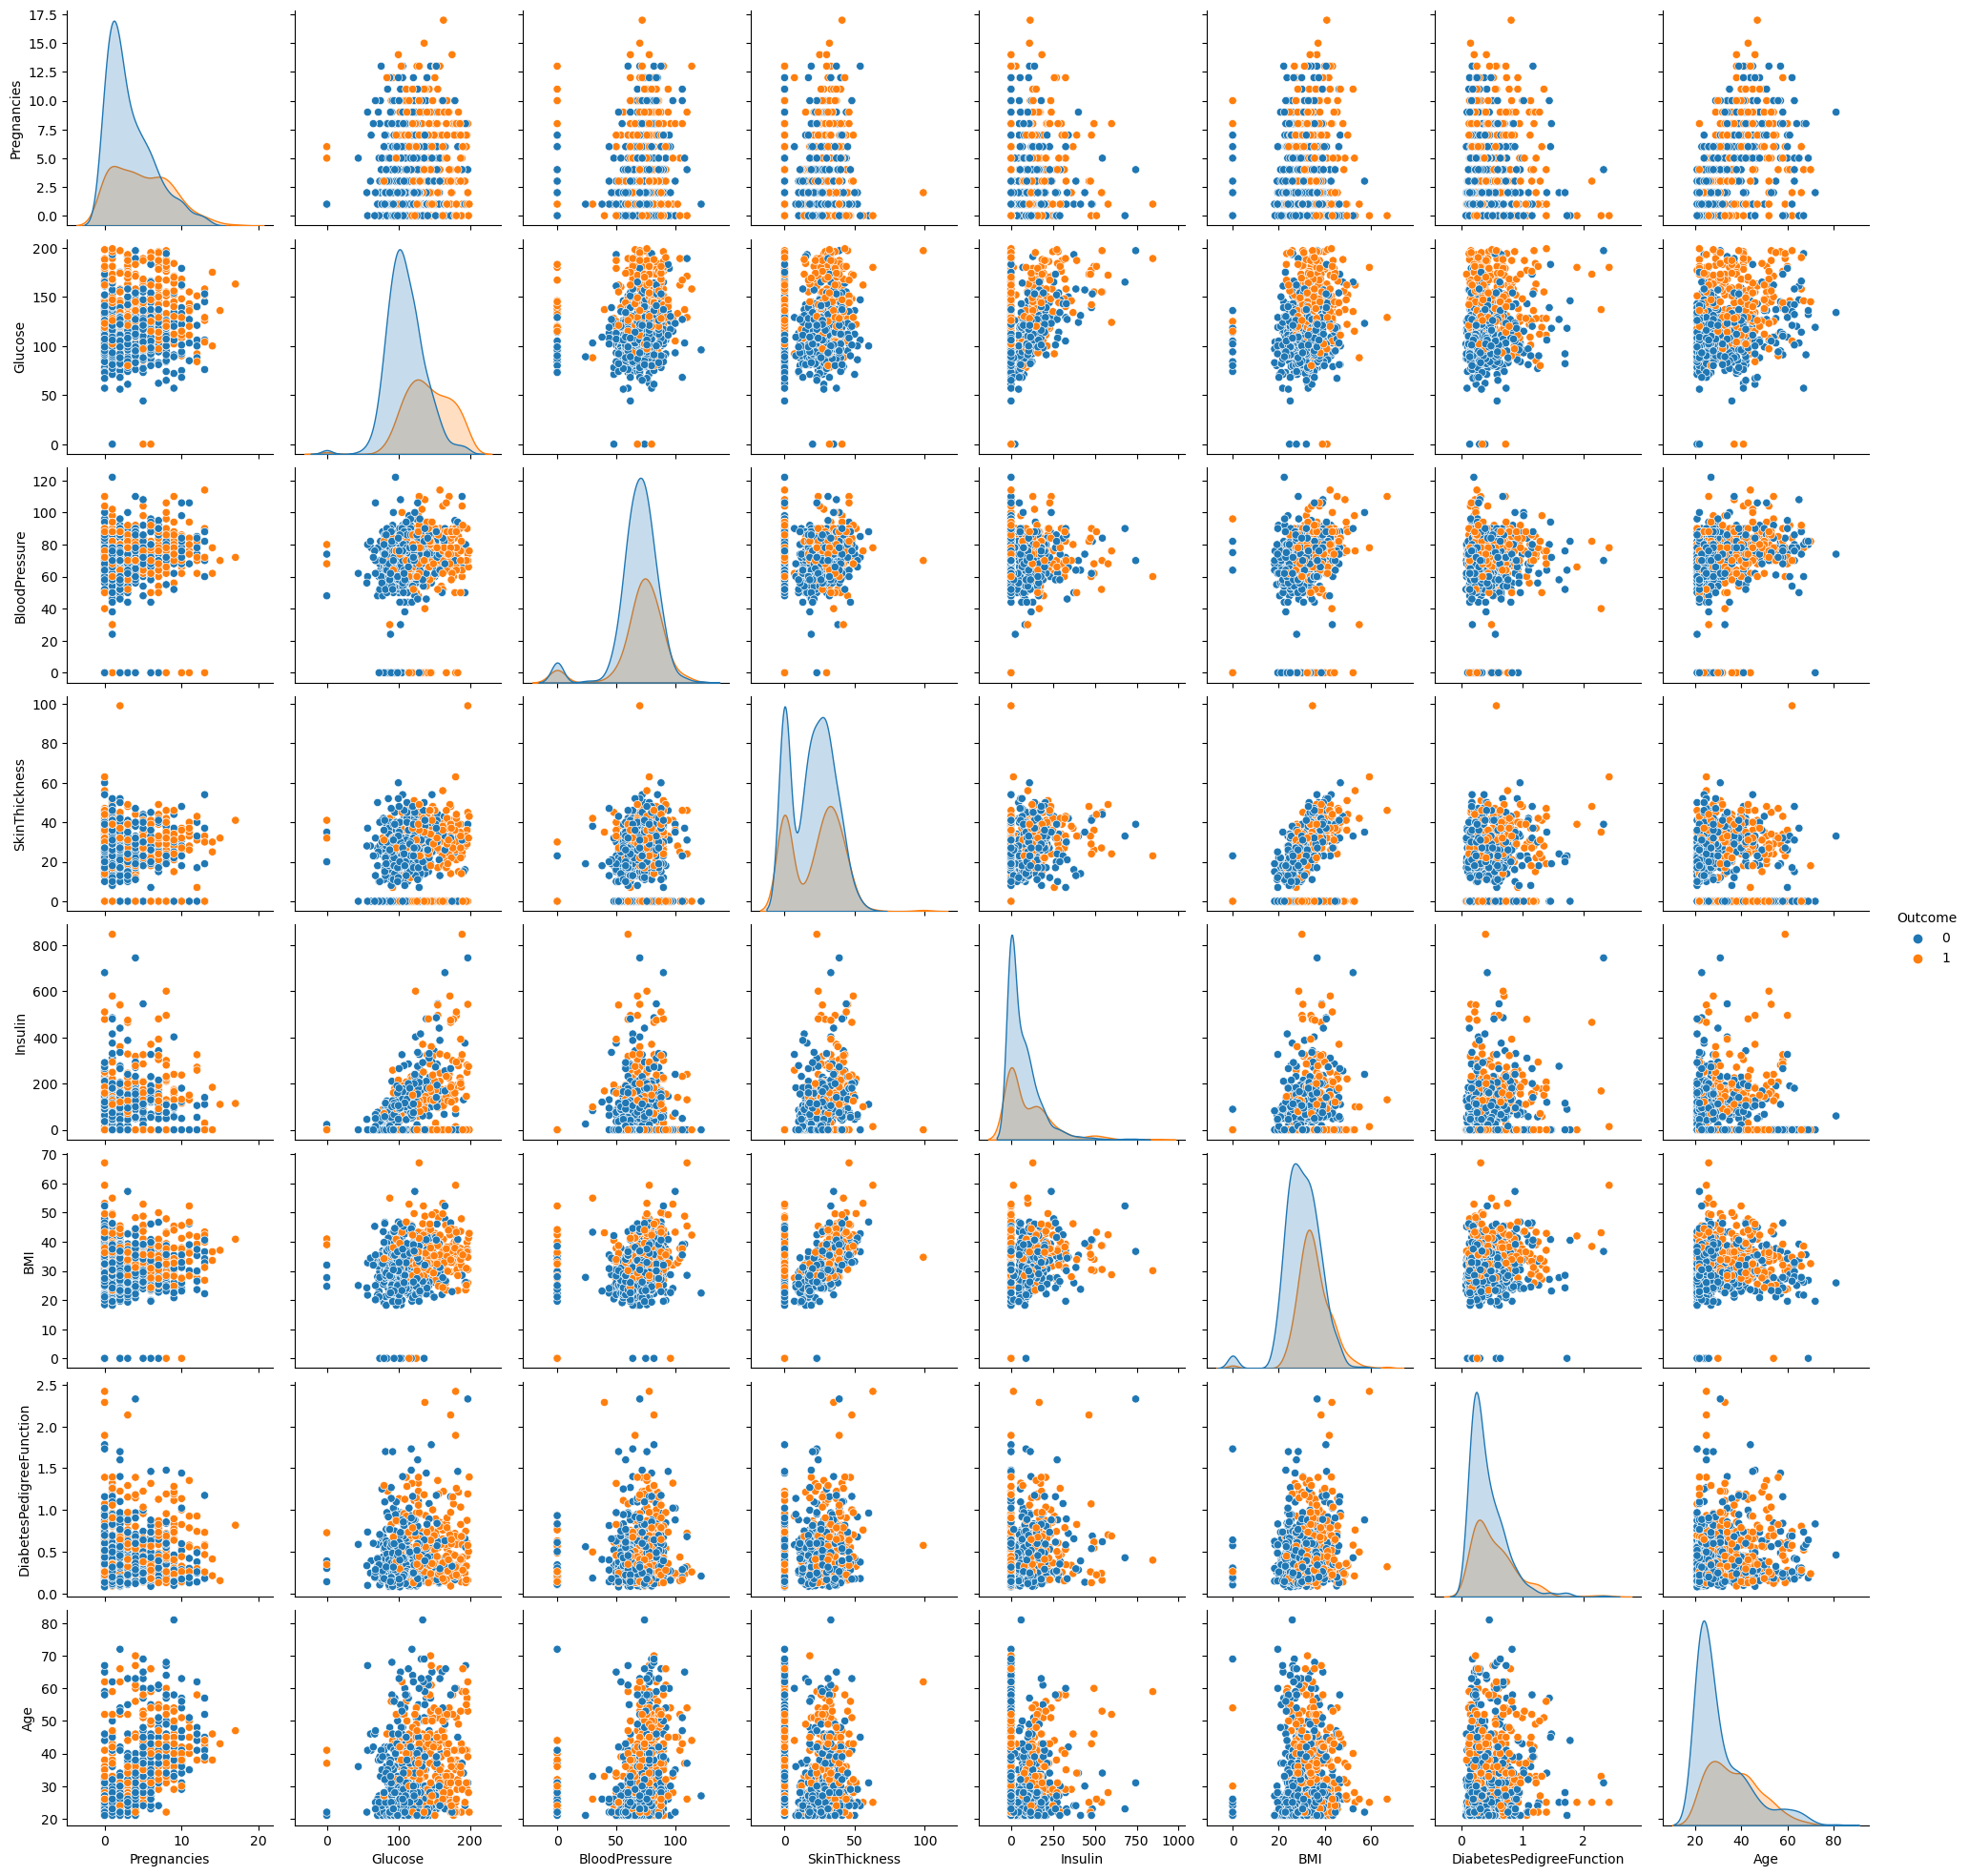

In [25]:
sns.pairplot(d_df,hue='Outcome')

In [15]:
from sklearn.tree import DecisionTreeClassifier
d_df=pd.read_csv(r"C:\Users\india\Downloads\DS2_C5_S4_Diabetes_Data_Concept.csv")
d_df.columns=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [16]:
d_df.groupby('label').mean()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
label,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [19]:
x=d_df.drop(columns='label')
y=d_df['label']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score 
print('Accuracy',accuracy_score(y_pred,y_test))

Accuracy 0.7229437229437229


In [25]:
from sklearn.metrics import confusion_matrix,f1_score
print('Confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred))

Confusion_matrix: [[141  57]
 [  7  26]]
accuracy: 0.7229437229437229
recall: 0.7229437229437229
f1-score: 0.6832518355340759
precision: 0.7878787878787878


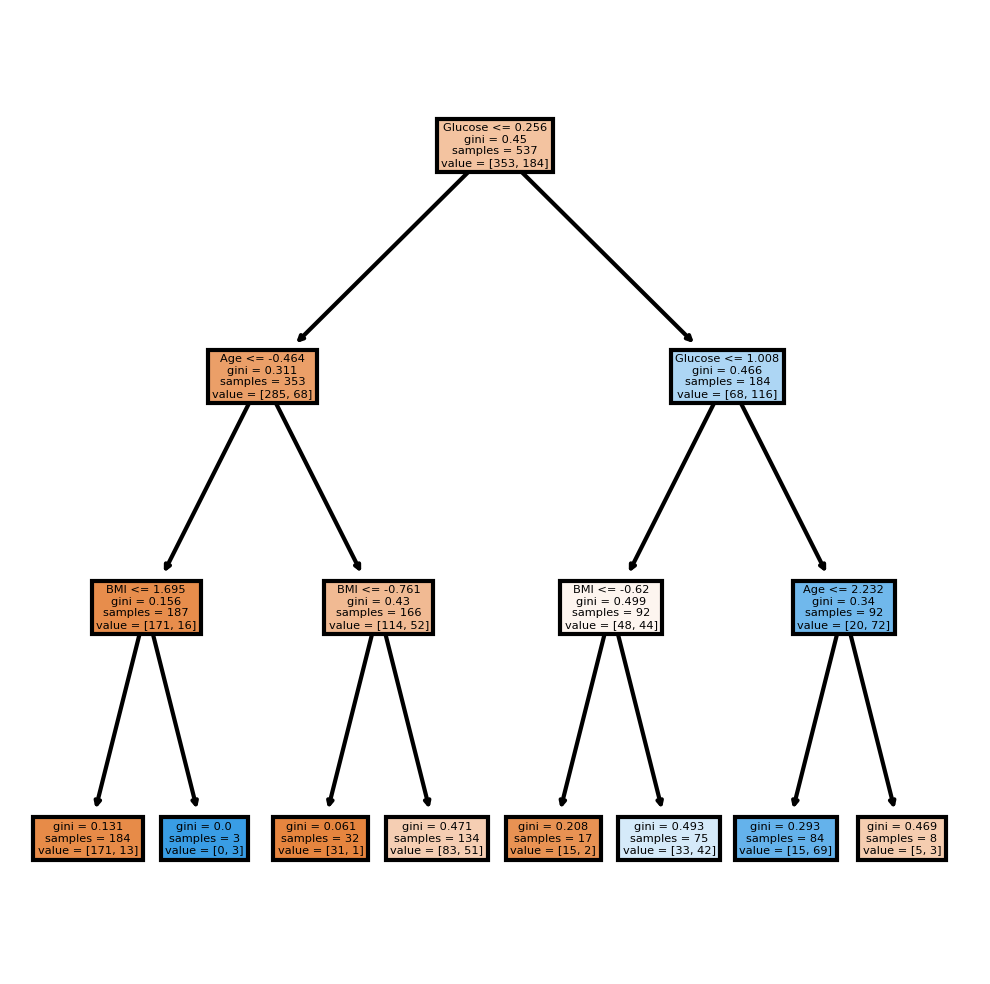

In [68]:
from sklearn import tree
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt, feature_names = list(d_df.columns), filled = True)
fig.savefig('Diabetes_Tree.png')

In [26]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load Iris Dataset
# Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and Train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Initialize and Train SVM Classifier,linear regression
svm_clf = SVC(kernel='linear', C=1.0, gamma='scale')
svm_clf.fit(X_train, y_train)

# Initialize and Train linear regression(naive bayes)
classifier = GaussianNB() 
classifier.fit(X_train,y_train)

# Make Predictions of all 3 algorithms
y_pred = classifier.predict(X_test)
dt_pred = dt_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)

# Evaluate Model for all 3 algorithms
dt_accuracy = accuracy_score(y_test, dt_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
na_accuracy=accuracy_score(y_test, y_pred)

# Finally Print accuracy showing in percentage for all 3 algorithms
print(f"Decision Tree Algorithm Accuracy: {dt_accuracy*100:.2f}%")
print(f"SVM AlgorithmAccuracy: {svm_accuracy*100:.2f}%")
print(f"Linear naive bayes Accuracy: {na_accuracy*100:.2f}%")

Decision Tree Algorithm Accuracy: 74.68%
SVM AlgorithmAccuracy: 75.32%
Linear naive bayes Accuracy: 76.62%
